# Transformación de datos

En estadística, la transformación de datos se utiliza para ajustar valores de una variable a una distribución normal. Los datos se pueden transformar usando por ejemplo la raíz cuadrada o el logaritmo para asegurarse que los datos se ajusten a los supuestos de los modelos. Con la transformación, los datos pueden utilizarse para análisis como regresión, t de student, correlación y análisis de varianza.




#### Determinación del sesgo o asimetría

Las medidas de skewness (sesgo o asimetría) son indicadores que permiten establecer el grado de sesgo que presenta una distribución de probabilidad de una variable aleatoria. Si una distribución es simétrica, existe el mismo número de valores a la derecha que a la izquierda de la media, por tanto, el mismo número de desviaciones con signo positivo que con signo negativo.

La función "skew" nos da una medida de en que dirección está desbalanceada la distribución y la función "kurt" del grado de desbalanceo (cómo es de "afilada")

Si el valor resultante de "skew" está por encima de +1 o por debajo de -1, los datos están muy sesgados. Si está entre +0.5 y -0.5, está sesgado moderadamente. Si el valor es 0, entonces los datos son simétricos.

La curtosis se define como:
$$g_2=\frac {\mu_4}{\sigma²}-3,\quad \mu_4=E[(X-\bar X)^4]$$
donde $\mu_4$ es el cuarto momento centrado respecto a la media. Se resta de tres porque la curtosis de una distribución normal es 3. La evidencia más reciente muestra que la curtosis poco tiene que ver con la antigua concepción del coeficiente de curtosis como un coeficiente de apuntamiento y, en cambio, mucho con las colas y la posible existencia de valores atípicos. Una elevada kurtosis (leptokúrtica) indica una concentración mucho mayor cerca de la media que desciende muy rápidamente sin llegar a desaparecer. Una kurtosis baja (platikúrtica) indica una concentración más uniforme y menos outliers.

Hours
Hours skewness: -1.194570307262883
Hours kurtosis: 0.9412265624999989


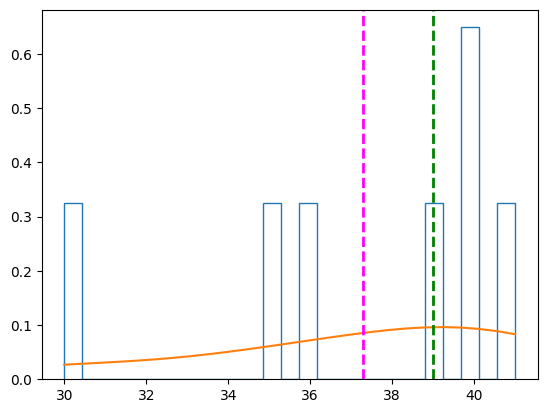



Raíz cuadrada
Raíz cuadrada skewness: -1.2737746003610426
Raíz cuadrada kurtosis: 1.2379234026771364


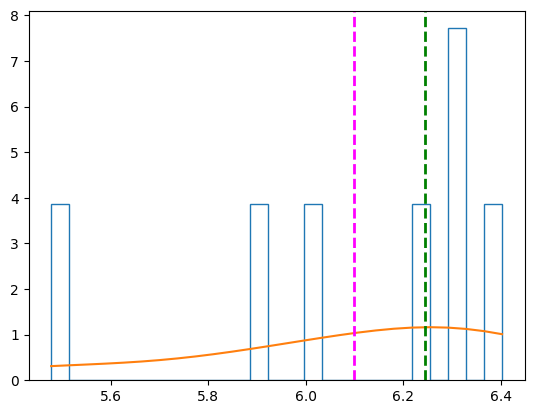



Raíz cúbica
Raíz cúbica skewness: -1.3003155607723045
Raíz cúbica kurtosis: 1.3389818259201984


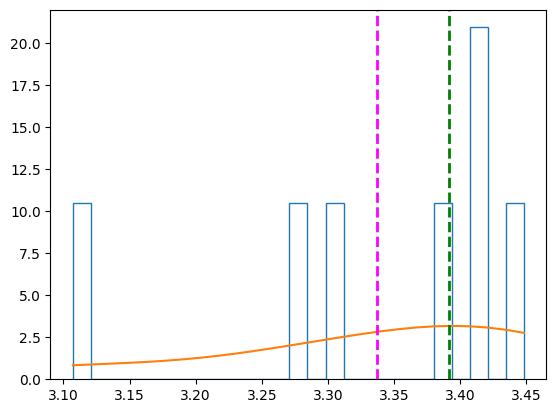



Logaritmo
Logaritmo skewness: -1.353500136617043
Logaritmo kurtosis: 1.54378781946179


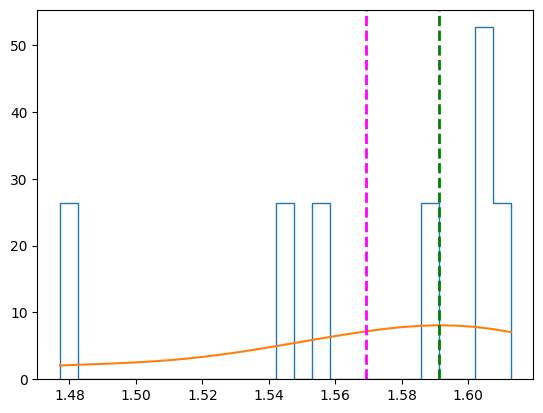



Cuadrado
Cuadrado skewness: -1.0395132200703212
Cuadrado kurtosis: 0.38433733170804985


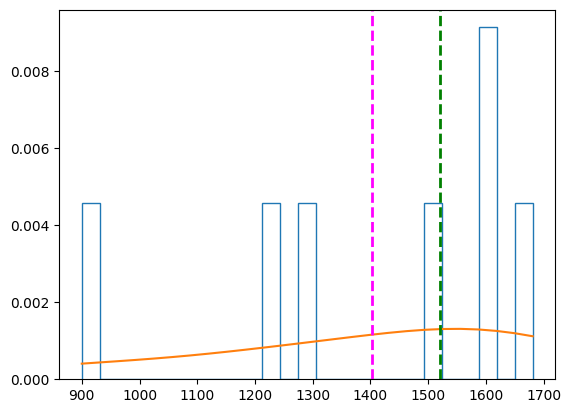

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[41,40,36,30,35,39,40]})

hours = df['Hours']
df["Raíz cuadrada"] = np.sqrt(hours)
df["Raíz cúbica"] = np.cbrt(hours)
df["Logaritmo"] = np.log10(hours)
df["Cuadrado"] = np.square(hours)

numcols = ["Hours", "Raíz cuadrada", "Raíz cúbica", "Logaritmo", "Cuadrado"]

for col in numcols:
    print(df[col].name)
    print(df[col].name + ' skewness: ' + str(df[col].skew()))
    print(df[col].name + ' kurtosis: ' + str(df[col].kurt()))
    density = stats.gaussian_kde(df[col])
    n, x, _ = plt.hist(df[col], histtype='step', density=True, bins=25)
    plt.plot(x, density(x)*6)
    plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2)
    plt.show()
    print('\n')

La función gaussian_kde hace una estimación no paramétrica de la función de densidad de probabilidad de una v.a. a partir de una muestra obtenida a partir de ella. Funciona mejor con distribuciones unimodales.
Observa que al dividir en 25 intervalos cada uno tiene una longitud de 0,44. La altitud de la barras se obtiene dividiendo el número de muestras que caen en ese intervalo entre el número de datos totales multiplicado por el tamaño del intervalo. Como hay siete datos si en un intervalo cae una muestra la altura de la barra será $\frac1{0.44\times7}=0.324$

#### Transformaciones raíz, potencia y logaritmo


Parece que la transformación que mejor se adapta es la de elevar al cuadrado porque tiene menor asimetría y una kurtosis muy baja y tiene una asimetría similar a las demás.

Probemos con una distribución sesgada hacia el lado izquierdo


Hours
Hours skewness: 1.0414066710431578
Hours kurtosis: -1.0324979462750035


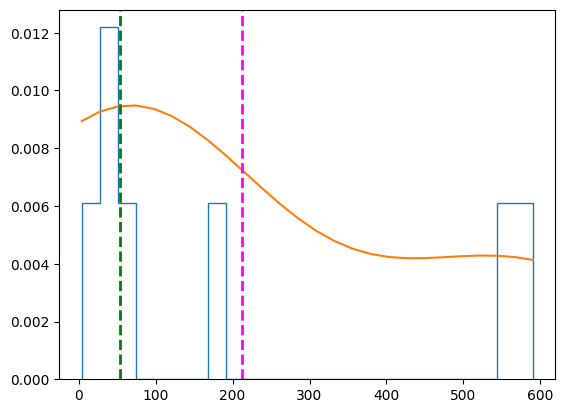



Raíz cuadrada
Raíz cuadrada skewness: 0.6466363822916701
Raíz cuadrada kurtosis: -1.3005114584611395


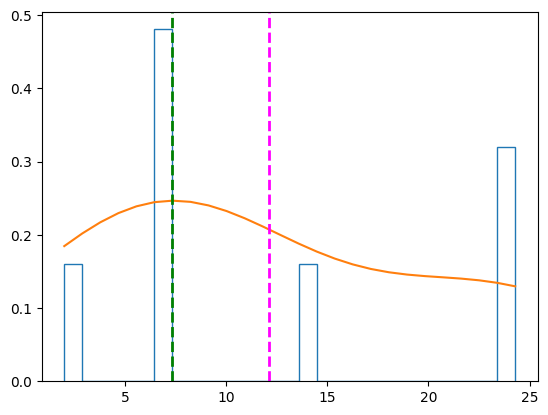



Raíz cúbica
Raíz cúbica skewness: 0.35173821875081895
Raíz cúbica kurtosis: -1.1739631698939217


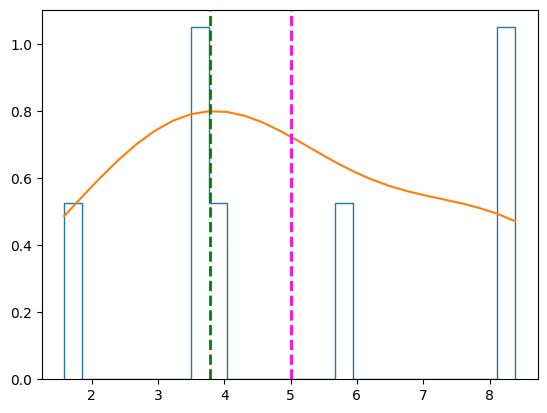



Logaritmo
Logaritmo skewness: -0.669683673653464
Logaritmo kurtosis: 0.5385785432597361


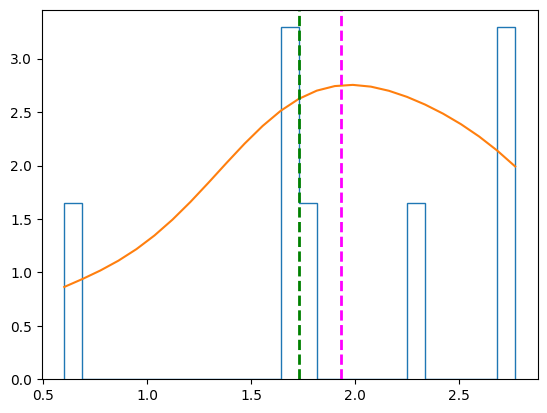



Cuadrado
Cuadrado skewness: 1.2343330712767013
Cuadrado kurtosis: -0.676193646641944


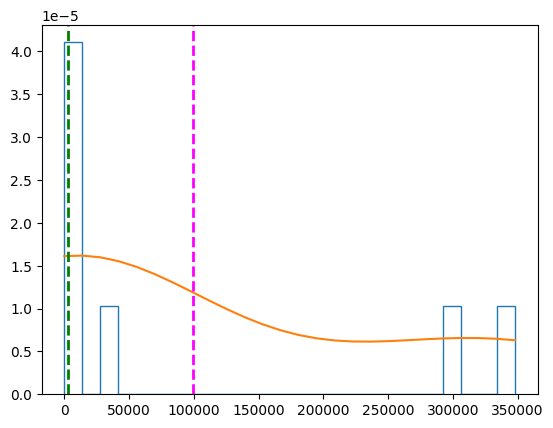

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[50,54,50,189,550,4,590]})

hours = df['Hours']
df["Raíz cuadrada"] = np.sqrt(hours)
df["Raíz cúbica"] = np.cbrt(hours)
df["Logaritmo"] = np.log10(hours)
df["Cuadrado"] = np.square(hours)

numcols = ["Hours", "Raíz cuadrada", "Raíz cúbica", "Logaritmo", "Cuadrado"]

for col in numcols:
    print(df[col].name)
    print(df[col].name + ' skewness: ' + str(df[col].skew()))
    print(df[col].name + ' kurtosis: ' + str(df[col].kurt()))
    density = stats.gaussian_kde(df[col])
    n, x, _ = plt.hist(df[col], histtype='step', density=True, bins=25)
    plt.plot(x, density(x)*6)
    plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=2)
    plt.show()
    print('\n')

En este caso parece se la transformación raíz cúbica la que menor asimetría y menor kurtosis obtiene.


#### Tratamiento de outliers
Si a pesar de las transformaciones anteriores (o en el caso de que no queramos efectuarlas) todavía nos quedan valores muy distantes de los demás podemos que optar por alguna de las siguientes soluciones para esos datos:


- Eliminarlos
- Imputarles otro valor (el percentil 5% o 95% por ejemplo)

El siguiente código se podría usar para eliminar outliers

In [7]:
q_low = df["Hours"].quantile(0.01)
q_hi  = df["Hours"].quantile(0.99)

df_filtrado = df[(df["Hours"] < q_hi) & (df["Hours"] > q_low)]
df_filtrado

,Name,Hours,Raíz cuadrada,Raíz cúbica,Logaritmo,Cuadrado
0,Dan,50,7.071068,3.684031,1.698970,2500
1,Joann,54,7.348469,3.779763,1.732394,2916
2,Pedro,50,7.071068,3.684031,1.698970,2500
3,Rosie,189,13.747727,5.738794,2.276462,35721
4,Ethan,550,23.452079,8.193213,2.740363,302500


O mejor incluso basarse en el valor Z-score para la operación. La función all comprueba si todos los valores en una columna/fila del DatraFrame son true. random.randn(100, 3) devuelve una matriz 100x3 de valores extraídos de una normal

In [11]:
import pandas as pd
import numpy as np
from scipy import stats


df_float = pd.DataFrame(np.random.randn(100, 3))
df_float_filtrado = df_float[(np.abs(stats.zscore(df_float)) < 1).all(axis=1)]
df_float_filtrado

,0,1,2
4,0.554599,-0.994604,0.231601
5,-0.025051,-0.600456,-0.300150
6,-0.203351,-0.351699,-0.952534
10,-0.686472,0.823857,1.044592
14,0.842044,-0.657004,0.537293
17,-0.402750,0.407456,0.349219
19,-0.059295,-0.874493,-0.632263
23,-0.654774,-0.285633,0.951085
25,-0.389158,-0.216239,-1.008966
27,0.591916,0.376039,0.064104


#### Datos con campos nulos
En caso de encontrarnos con datos faltantes podemos optar por suprimir esos registros (si nuestra fuente de datos es abundante) o bien imputarles un varlor (la media o la mediana suele ser un buen valor candidato)



In [16]:

df['col_filtrada'] = df['Hours'].fillna( df['Hours'].mean()) # Imputando los valores perdidos por la media
df['col_filtrada'] = df['Hours'].fillna( df['Hours'].median()) # Imputando los valores perdidos por la mediana


En sklearn también hay funciones especializadas en la imputación (SimpleInputer, KNNImputer,  ...)

In [18]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)
neighbors = knn.fit_transform(df_float)

#### Binning
Es una técnica transformación que permite agrupar en variables categóricas las variables numéricas. Normalmente se hace determinando rangos. Esto permite determinar patrones que no se observarían facilmente con datos continuos


In [ ]:
import pandas as pd

#perform binning with 3 bins
df['new_bin'] = pd.qcut(df['variable_name'], q=3)

También podríamos utilizar un algoritmo especializado para definir los rangos de cada uno de los grupos, como el algoritmo de K means (K medias). Este método de agrupamiento tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. Esta técnica es muy utilizada en minería de datos.

#### Estandarización de datos
La estandarización (también llamada normalización o escalado) se refiere al ajuste de los valores medidos en diferentes escalas respecto a una escala común. Es decir, ajusta todas las columnas al mismo rango.

Min-Max

La transformación es:
$$Xstd = \frac{(X - X.min(axis=0))}{(X.max(axis=0) - X.min(axis=0))}$$

$$Xscaled = X_std * (max - min) + min$$


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# define data
data = ([[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


Z score:

Es el resultado de la restar cada valor menos la media poblacional y luego dividirlo entre la desviación estándar, como se aprecia en la siguiente fórmula

$$Z=\frac{(x_i−μ)}{σ}$$

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# define data
data = ([[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]])
print(data)
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


<a name="exercises"></a>
<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#007BC4; color: white;">
      <h2>EJERCICIOS</h2>
    <hr style="border: 0.5px solid #ffffff;">
   <ul style="margin-bottom: 20px;">
       <li>Calcular la <b>kurtosis</b> de una distribución uniforme:
           <ul>
               <li>Genera una muestra a partir de una normal con np.random.uniform</li>
               <li>Utiliza la función kurt para determinar la kurtosis</li>
           </ul>
       </li>
       <li>Comprobar que la desviación típica es invariante a traslaciones pero no a dilataciones o contracciones</li>
       <li>Comprobar que la curtosis es invariante a cualquier tipo de transformación lineal</li>
    </ul>
</div>